# Hypothesis Testing with Insurance Data

## For each question, make sure to:

* State your Null Hypothesis and Alternative Hypothesis


* Select the correct test according to the data type and number of samples


* Test the assumptions of your selected test.


* Execute the selected test, or the alternative test (if you do not meet the assumptions)


* Interpret your p-value and reject or fail to reject your null hypothesis 


* Show a supporting visualization that helps display the result

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv(r"C:\Users\nbeac\OneDrive\Documents\GitHub\Hypothesis-Testing-with-Insurance-Data\Data\insurance - insurance.csv")
pd.set_option('display.max_columns', None)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 1. Do smokers have higher insurance charges than non-smokers?

In [3]:
smokers = df.loc[ df['smoker']=='yes',"charges"]
non_smokers = df.loc[ df['smoker']=='no',"charges"]
## Getting means for gender height
print(f"For Non_Smokers (n={len(non_smokers)}): Mean={np.mean(non_smokers):.2f}")
print(f"For Smokers (n={len(smokers)}): Mean={np.mean(smokers):.2f}")

For Non_Smokers (n=1064): Mean=8434.27
For Smokers (n=274): Mean=32050.23


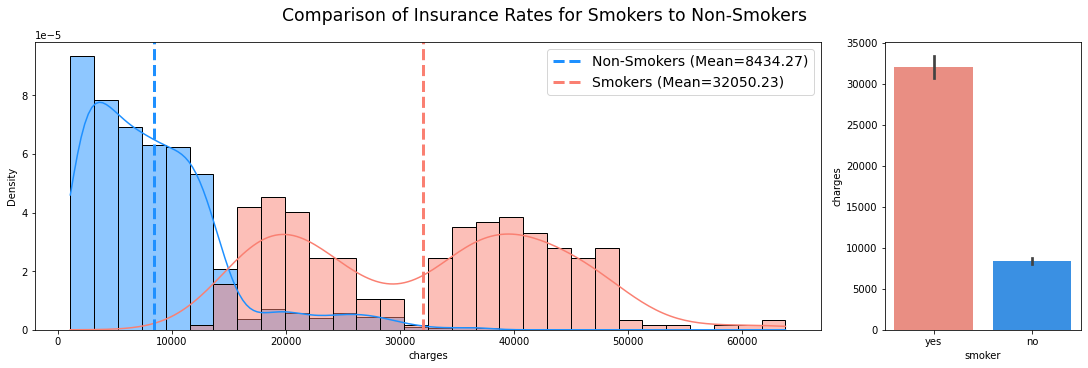

In [4]:
gender_palette={'no':'dodgerblue', "yes":'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (15,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=df, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=gender_palette)

ax.axvline(np.mean(non_smokers), ls='--',lw=3, 
           label=f"Non-Smokers (Mean={np.mean(non_smokers):.2f})",color=gender_palette['no'])

ax.axvline(np.mean(smokers), ls='--', lw=3, 
           label=f"Smokers (Mean={np.mean(smokers):.2f})",color=gender_palette['yes'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=df, x='smoker',y='charges',ax = ax_bar,palette=gender_palette)
fig.suptitle('Comparison of Insurance Rates for Smokers to Non-Smokers',fontsize='xx-large');

#### Hypothesis

As you can see, there is a significant difference between the means of those that smoke and those that do not. 

I will use the t-test to determine if this difference is statistically significant of if it is just due to randomness in the samples. 

* Null-Hypothesis: Smokers have a higher charge for insurance than those that do not smoke.

* Alternative Hypothesis: Smokers are not charged a higher insurance than those that do not smoke. 

### Testing for Outliers

#### Smokers Outliers

In [5]:
zscores_f = stats.zscore(smokers)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

0

In [6]:
result_smokers = stats.normaltest(smokers)
result_smokers

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

#### Non-Smokers Outliers

In [7]:
zscores_m = stats.zscore(non_smokers)
outliers_m = abs(zscores_m)>3
np.sum(outliers_m)

24

In [8]:
# Removing outliers from non_smokers
non_smokers = non_smokers[(np.abs(stats.zscore(non_smokers)) < 3)]
zscores= stats.zscore(non_smokers)
outliers = abs(zscores)>3
np.sum(outliers)

19

In [9]:
result_non_smokers = stats.normaltest(non_smokers)
result_non_smokers

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

### 2. Are men more likely to smoke than women?

In [10]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [11]:
# bin_sex = df['sex'].replace({'male': 0, 'female': 1})

In [22]:
bin_smoker = df['smoker'].replace({'yes': 0, 'no': 1})
bin_smoker.count()

1338

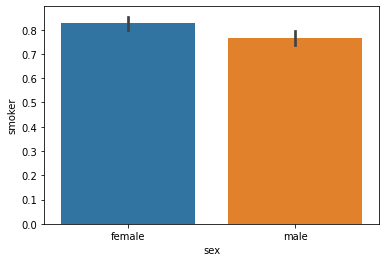

In [25]:
sns.barplot(data=df, x='sex', y=bin_smoker);

#### Hypothesis

The above chart shows that females are more likely to smoke instead of men.

I'm going to preform a few tests just to ensure the information above is correct. 

### Testing for Outliers

#### 

### 3. Do different regions have different charges, on average?